In [151]:
import numpy as np
import pandas as pd
import math
from collections import OrderedDict
import matplotlib.pyplot as plt

In [152]:
data = pd.read_csv('group04.txt')
data

,x,y
0,-4.98,896260.03
1,-4.94,836639.80
2,-4.89,767007.86
3,-4.88,753705.40
4,-4.78,631368.25
...,...,...
95,4.53,1030635.93
96,4.56,1083709.22
97,4.64,1237097.49
98,4.70,1364282.15


In [153]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
print(len(X), y.shape)

100 (100,)


In [154]:
X

array([-4.98, -4.94, -4.89, -4.88, -4.78, -4.76, -4.71, -4.62, -4.52,
       -4.39, -4.38, -4.37, -4.31, -3.84, -3.75, -3.72, -3.58, -3.55,
       -3.4 , -3.36, -3.32, -3.31, -3.22, -2.99, -2.84, -2.79, -2.61,
       -2.47, -2.32, -2.31, -2.21, -2.2 , -2.11, -2.09, -1.96, -1.91,
       -1.85, -1.82, -1.72, -1.68, -1.6 , -1.57, -1.54, -1.41, -1.39,
       -1.33, -1.28, -1.09, -0.9 , -0.82, -0.61, -0.29, -0.19, -0.05,
       -0.  ,  0.24,  0.27,  0.35,  0.54,  0.55,  0.63,  0.73,  0.75,
        1.03,  1.05,  1.14,  1.21,  1.26,  1.35,  1.55,  1.82,  2.04,
        2.1 ,  2.29,  2.38,  2.49,  2.55,  2.93,  2.94,  3.15,  3.26,
        3.27,  3.3 ,  3.34,  3.47,  3.49,  3.59,  3.73,  3.81,  3.85,
        3.88,  3.9 ,  4.01,  4.15,  4.38,  4.53,  4.56,  4.64,  4.7 ,
        4.86])

In [155]:
y

array([8.96260030e+05, 8.36639800e+05, 7.67007860e+05, 7.53705400e+05,
       6.31368250e+05, 6.09101210e+05, 5.56409190e+05, 4.71524510e+05,
       3.90676640e+05, 3.03824770e+05, 2.97903610e+05, 2.92084150e+05,
       2.59208910e+05, 9.49696300e+04, 7.71442500e+04, 7.18906000e+04,
       5.12770200e+04, 4.76034600e+04, 3.24646600e+04, 2.92174500e+04,
       2.62586800e+04, 2.55616400e+04, 1.99733600e+04, 1.02331200e+04,
       6.39803000e+03, 5.43467000e+03, 2.92922000e+03, 1.74532000e+03,
       9.60020000e+02, 9.20220000e+02, 5.99330000e+02, 5.73410000e+02,
       3.80850000e+02, 3.46160000e+02, 1.81600000e+02, 1.41150000e+02,
       1.00870000e+02, 8.55000000e+01, 4.72400000e+01, 3.75300000e+01,
       2.21300000e+01, 1.85800000e+01, 1.48400000e+01, 6.88000000e+00,
       5.84000000e+00, 3.51000000e+00, 3.03000000e+00, 2.44000000e+00,
       8.00000000e-01, 4.00000000e-02, 2.70000000e-01, 2.70000000e-01,
       1.50000000e-01, 1.10000000e+00, 1.86000000e+00, 3.66000000e+00,
      

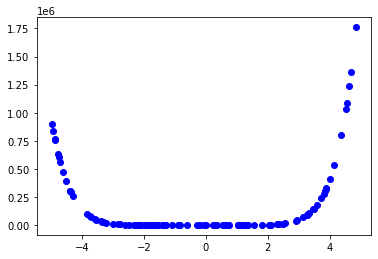

In [156]:
plt.scatter(X, y, color = 'blue')

In [157]:
def normalize(value):
    return (value - np.mean(value))/(np.max(value) - np.min(value))

In [158]:
def transform(x, degree):
    m = len(x)
    X_trans = np.ones((m,1))
    j = 0
    for j in range(degree + 1):
        if j != 0:
            x_pow = normalize(np.power(x,j))
            X_trans = np.append(X_trans, x_pow.reshape( -1, 1 ), axis = 1)
    return X_trans

In [159]:
X_trans = transform(X, 3)
X_trans

array([[ 1.00000000e+00, -4.74115854e-01,  6.36536467e-01,
        -4.96171665e-01],
       [ 1.00000000e+00, -4.70050813e-01,  6.20536725e-01,
        -4.83782903e-01],
       [ 1.00000000e+00, -4.64969512e-01,  6.00718496e-01,
        -4.68576622e-01],
       [ 1.00000000e+00, -4.63953252e-01,  5.96779044e-01,
        -4.65572403e-01],
       [ 1.00000000e+00, -4.53790650e-01,  5.57828059e-01,
        -4.36201858e-01],
       [ 1.00000000e+00, -4.51758130e-01,  5.50134635e-01,
        -4.30472980e-01],
       [ 1.00000000e+00, -4.46676829e-01,  5.31042201e-01,
        -4.16360081e-01],
       [ 1.00000000e+00, -4.37530488e-01,  4.97183876e-01,
        -3.91701873e-01],
       [ 1.00000000e+00, -4.27367886e-01,  4.60329632e-01,
        -3.65408158e-01],
       [ 1.00000000e+00, -4.14156504e-01,  4.13624740e-01,
        -3.32923985e-01],
       [ 1.00000000e+00, -4.13140244e-01,  4.10088507e-01,
        -3.30503281e-01],
       [ 1.00000000e+00, -4.12123984e-01,  4.06560338e-01,
      

In [160]:
def hypothesis(x, w):
    h = w[0]
    for i in np.arange(1, len(w)):
        h += w[i]*(x ** i)
    return h

In [161]:
def Error(x, y, w):
    m = len(y)
    h = hypothesis(x,w)
    error = h-y
    return (1/(2*m))*np.sum(error ** 2)

In [162]:
def gradDescent(x,y,degree,learningRate,tol,iterations):
    X_trans = transform(x,degree)
    m = len(x)
    w = np.zeros(degree+1)
    errors = []
    for i in range(iterations):
        h = hypothesis(x,w)
        e = h-y
        w += -learningRate * (1/m)*np.dot(e,X_trans)
        ein = Error(x,y,w)
        errors.append(ein)
        if ein < tol:
            break
    return w,errors

In [163]:
w,errors = gradDescent(X,y,4,0.01,10**-3,1000)
w

array([ 24259.58855984, -24223.44227725, -30930.18353594,   4216.03542815,
         3189.72418373])

In [164]:
errors

[24131208875.07762,
 14355879438.400352,
 12171437693.127783,
 11317989425.520025,
 10697227679.62427,
 10155864114.490047,
 9685148536.034872,
 9285432877.419317,
 8951183415.198801,
 8673457073.069557,
 8442687686.651501,
 8250082181.257615,
 8088107385.340056,
 7950539757.224731,
 7832339560.184622,
 7729472842.70394,
 7638733753.599692,
 7557586660.840685,
 7484033043.304861,
 7416502233.654658,
 7353763036.65229,
 7294852827.139433,
 7239020954.232866,
 7185683709.77389,
 7134388578.879407,
 7084785909.768781,
 7036606498.398032,
 6989643880.128292,
 6943740362.2419195,
 6898776026.048688,
 6854660083.802033,
 6811324100.882968,
 6768716693.763938,
 6726799394.108207,
 6685543433.023242,
 6644927250.215933,
 6604934573.198037,
 6565552943.847724,
 6526772595.215236,
 6488585601.799805,
 6450985242.68529,
 6413965529.752856,
 6377520863.368296,
 6341645786.010009,
 6306334810.69273,
 6271582306.0953665,
 6237382424.293456,
 6203729060.14553,
 6170615833.862739,
 6138036090.240485,


In [165]:
Y_pred = hypothesis(X,w)
Y_pred

array([ 8.18977016e+05,  7.80451144e+05,  7.33972535e+05,  7.24897129e+05,
        6.38080184e+05,  6.21557902e+05,  5.81445011e+05,  5.13423098e+05,
        4.43896857e+05,  3.62522963e+05,  3.56667538e+05,  3.50868278e+05,
        3.17234916e+05,  1.16018883e+05,  8.85922150e+04,  8.01462693e+04,
        4.50672103e+04,  3.84360726e+04,  9.61363984e+03,  3.08035982e+03,
       -2.99646726e+03, -4.44608550e+03, -1.62878357e+04, -3.75897270e+04,
       -4.54861041e+04, -4.72105380e+04, -5.01578595e+04, -4.94181812e+04,
       -4.62599454e+04, -4.59752242e+04, -4.26909526e+04, -4.23220691e+04,
       -3.87142211e+04, -3.78482396e+04, -3.17550478e+04, -2.92359598e+04,
       -2.61170975e+04, -2.45259089e+04, -1.91161402e+04, -1.69241098e+04,
       -1.25288784e+04, -1.08851131e+04, -9.24784722e+03, -2.28861721e+03,
       -1.24542555e+03,  1.82623416e+03,  4.31026550e+03,  1.29576574e+04,
        2.00265262e+04,  2.24429125e+04,  2.70114513e+04,  2.86028938e+04,
        2.77207021e+04,  

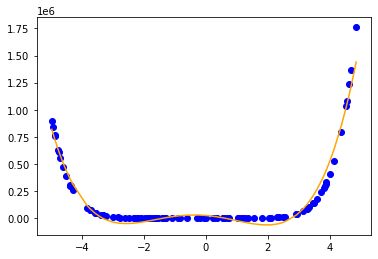

In [166]:
plt.figure()
plt.scatter(X,y, color = 'blue')
plt.plot( X, Y_pred, color = 'orange')

In [167]:
line = w[0]
label_holder = []
label_holder.append('%.*f' % (2, w[0]))
for i in np.arange(1,len(w)):
    line += w[i] * X ** i
    label_holder.append(' + ' +'%.*f' % (2, w[i]) + r'$x^' + str(i) + '$')
label_holder

['24259.59',
 ' + -24223.44$x^1$',
 ' + -30930.18$x^2$',
 ' + 4216.04$x^3$',
 ' + 3189.72$x^4$']

Text(0, 0.5, 'y')

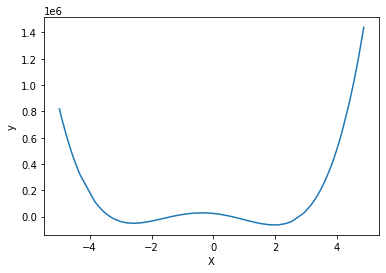

In [168]:
plt.plot(X, line, label = ''.join(label_holder))
plt.xlabel('X')
plt.ylabel('y')